
- Choose any imbalanced dataset DONE

- Apply any needed preprocessing DONE

- Apply Resampling on this dataset (both undersampling then oversampling )

- Choose Two Ensemble models ( one Bagging and one boosting )

- Train each model on the processed data 

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model

- Optimize the two models by choose different parameters to get better results 

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model for the optimized models

- Submit The Code (.py or .ipynb)

- Work on Groups (Only Two or three is allowed for each group, don't work alone)

- Their will be a discussion for your code

# IMPORTING  LIBRARIES 

In [234]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#? Sickit-learn 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#? imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler





## Reading and inspection the data

In [235]:

df = pd.read_csv("dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [236]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [237]:

#todo checking for misinput vales

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


gender: ['Male' 'Female' 'Other']
ever_married: ['No' 'Yes']
work_type: ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type: ['Rural' 'Urban']
smoking_status: [nan 'never smoked' 'formerly smoked' 'smokes']


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [239]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [240]:

#! The Min age is less than one , lets explore these more

In [241]:
df[(df["age"] < 1) & (df["stroke"] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [242]:
df[df["age"] < 1]["heart_disease"].value_counts()


heart_disease
0    496
Name: count, dtype: int64

In [243]:

#! does it make sense that there are bmi values like this?
df[(df["age"] < 2) & (df["bmi"] > 30)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2591,760,Male,0.80,0,0,No,children,Urban,75.22,33.1,NaN,0
13394,18042,Male,1.72,0,0,No,children,Urban,81.82,30.7,NaN,0
15683,45213,Male,1.56,0,0,No,children,Rural,72.73,31.2,NaN,0
17445,18714,Male,1.80,0,0,No,children,Rural,69.67,33.2,NaN,0
25548,36436,Male,1.32,0,0,No,children,Urban,82.52,36.4,NaN,0
28657,26091,Male,0.08,0,0,No,children,Rural,84.93,30.6,NaN,0


In [244]:

#! however by reasearch , we dont usually count the bmi for babies 
print(df[df["age"] < 1]["bmi"].min() , df[df["age"] < 1]["bmi"].max())

10.6 33.1


bmi is calculated as weight (in kilograms) divided by the square of height (in meters), and it is commonly used for older children, adolescents, and adults to assess body composition and risk factors for various health conditions. , so the values above seem unusually high


In [245]:

df[(df["age"] < 18) & (df["stroke"] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9961,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,NaN,1
14802,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,NaN,1


In [246]:
stroke_ages = df[df['stroke'] == 1]['age']

#? Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = stroke_ages.quantile(0.25)
Q3 = stroke_ages.quantile(0.75)
IQR = Q3 - Q1

#? Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = stroke_ages[(stroke_ages < lower_bound) | (stroke_ages > upper_bound)]
print(outliers)



9961      1.32
14802    14.00
15665    21.00
36235    29.00
Name: age, dtype: float64


 however , our goal is to predict stroke occurrences, you should generally keep all data points, including those that might be considered statistical outliers, because these data points could provide valuable information for your model. Outliers can sometimes represent rare but important cases that your model should learn to predict.

In [247]:

#? Summary statistics for all columns including non-numerical
df.drop(columns=["id"]).describe(include='all')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [248]:
df.isnull().sum().sum()


14754

In [249]:
def nan_values(df):
    nan_count=df.isna().sum().sort_values(ascending=False)
    nan_percentage = (nan_count / df.shape[0])*100
    num_unique = df.nunique()
    nans = pd.concat([nan_count, nan_percentage,num_unique],axis = 1).reset_index()
    nans.rename(columns={0:'Nan count' , 1:'Nan Percentage', 2:"num_unique"},inplace=True)
    return nans
nan_values(df)

,index,Nan count,Nan Percentage,num_unique
0,smoking_status,13292,30.626728,3
1,bmi,1462,3.368664,555
2,id,0,0.000000,43400
3,gender,0,0.000000,3
4,age,0,0.000000,104
5,hypertension,0,0.000000,2
6,heart_disease,0,0.000000,2
7,ever_married,0,0.000000,2
8,work_type,0,0.000000,5
9,Residence_type,0,0.000000,2


In [250]:

#todo check if the data is imblanaced 
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

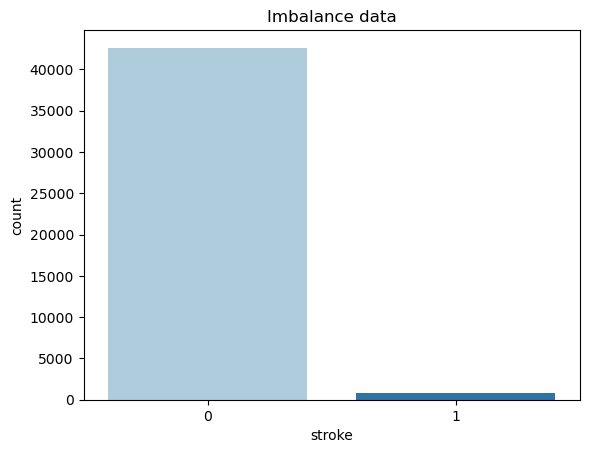

In [251]:
colors = sns.color_palette("Paired")  #?https://seaborn.pydata.org/tutorial/color_palettes.html
sns.countplot(x='stroke', data=df,palette=colors)
plt.title("Imbalance data")
plt.show()


In [252]:

#? Calculate Z-Score for each numerical column , (observation - mean)/ Standard deviation 
z_scores = (df.select_dtypes(include=np.number) - df.select_dtypes(include=np.number).mean()) / df.select_dtypes(include=np.number).std()
outliers = (z_scores > 3) | (z_scores < -3)

print("Outliers:")
display(df[outliers.any(axis=1)]["stroke"].value_counts())


Outliers:


stroke
0    5969
1     783
Name: count, dtype: int64

we will retain Outliers for Modeling  and ensure that our model is robust enough to handle outliers . ex,tree-based models like Random Forests

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

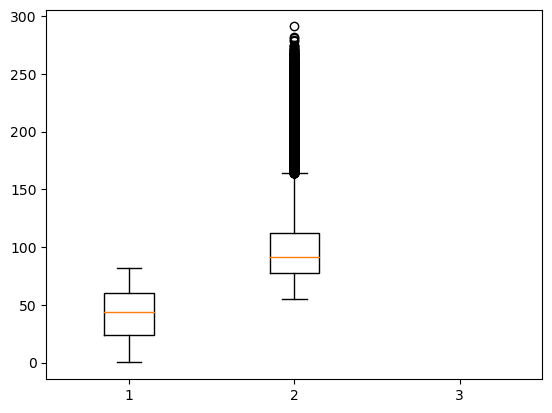

In [253]:
float_columns = df.select_dtypes(include=['float64']).columns
plt.boxplot(df[float_columns])
display(float_columns)


bmi graph is missing because there are missing values (NaNs) in that column.

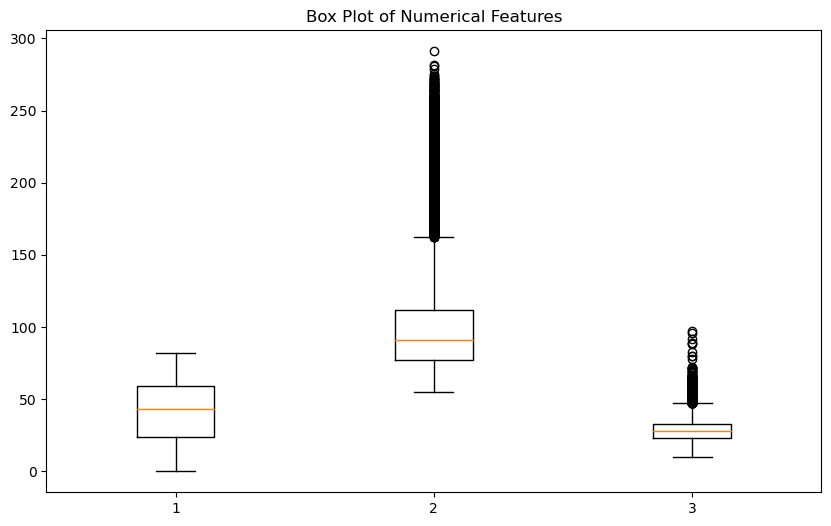

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [254]:
plt.figure(figsize=(10, 6))
plt.boxplot(df[float_columns].dropna())  # Drop NaNs before plotting
plt.title("Box Plot of Numerical Features")
plt.show()
display(float_columns)


Text(0.5, 1.0, 'Percentage of Stroke and Not Stroke')

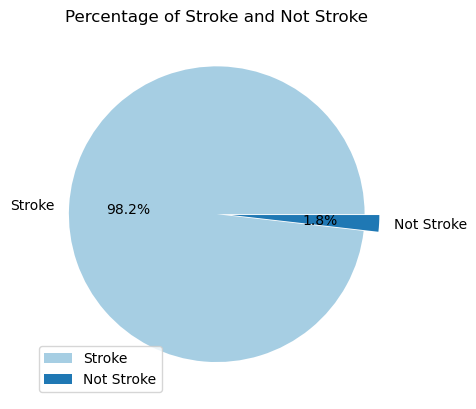

In [255]:
explode = (0, 0.1)

plt.pie(df["stroke"].value_counts().values, labels=["Stroke", "Not Stroke"], autopct= '%1.1f%%',colors=colors, explode=explode)
plt.legend(["Stroke", "Not Stroke"])
plt.title("Percentage of Stroke and Not Stroke")



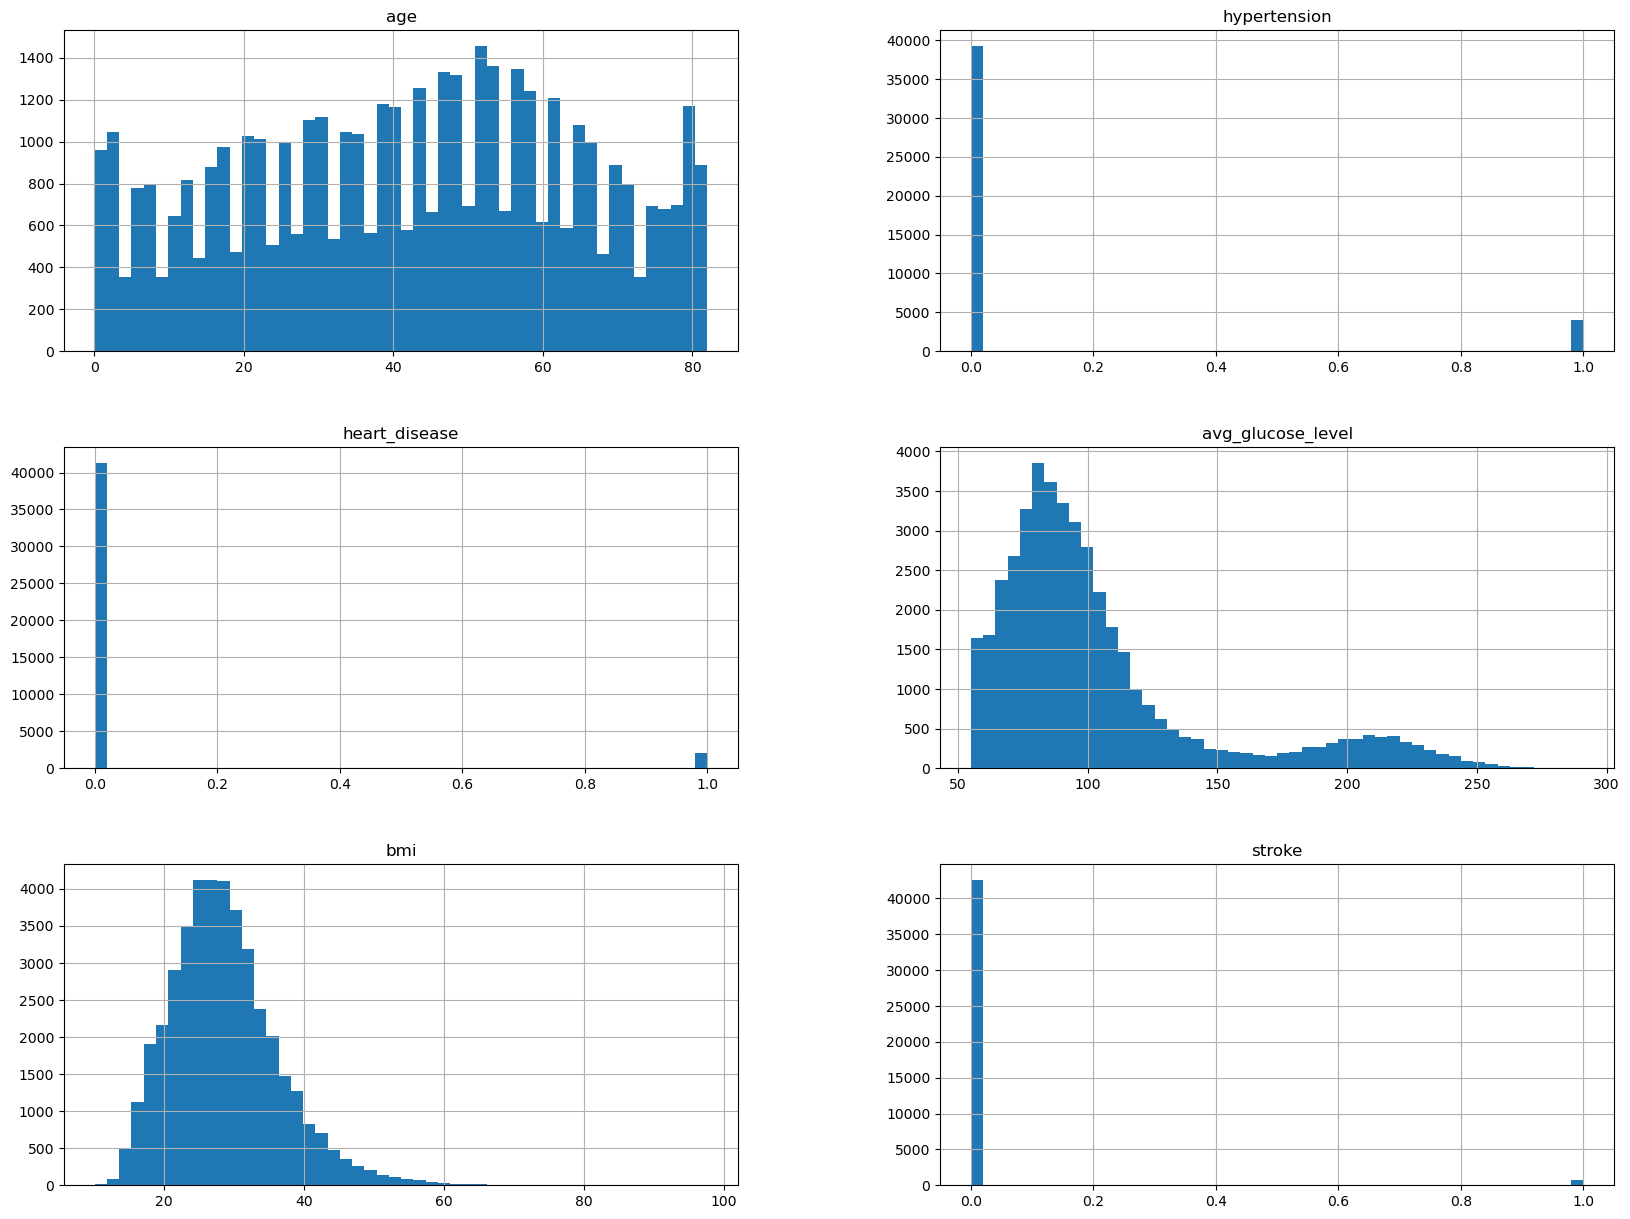

In [256]:
df.drop(columns=["id"]).hist(bins =50 , figsize=(20,15))
plt.show()


/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

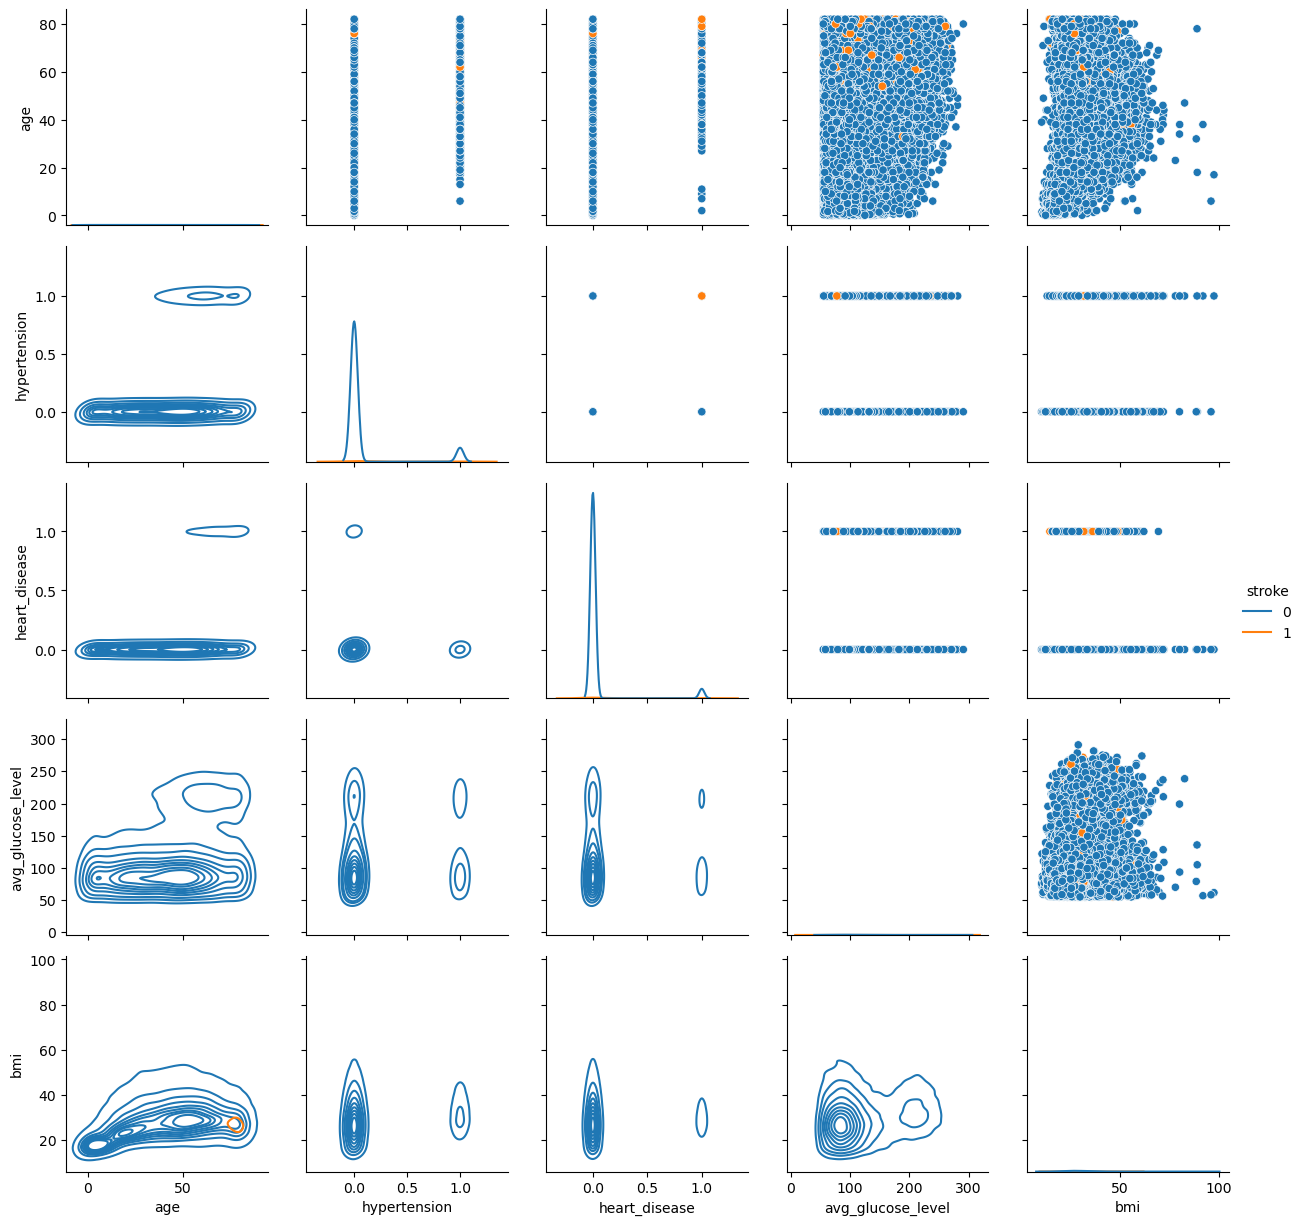

In [107]:
g = sns.PairGrid(df.drop(columns=["id"]), hue="stroke")
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, cmap="Blues")

# Add a legend
g.add_legend()

# Display the plot
plt.show()

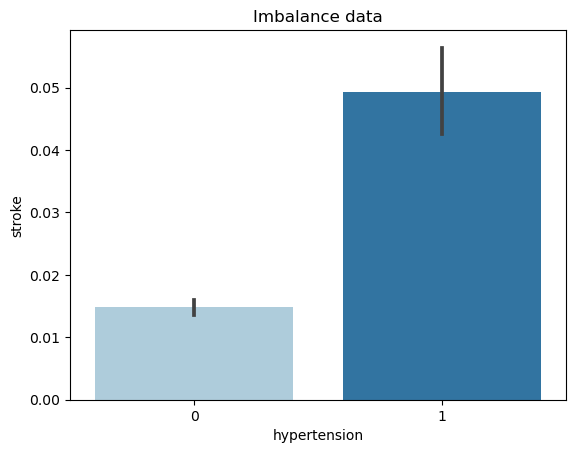

In [257]:
sns.barplot(x='hypertension',y="stroke", data=df,palette=colors)
plt.title("Imbalance data")
plt.show()

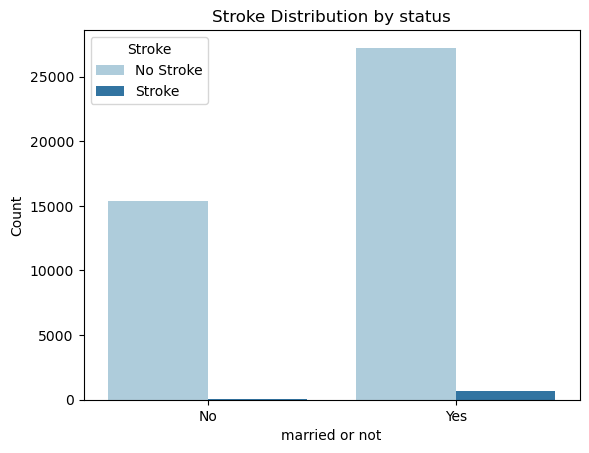

In [258]:

sns.countplot(x='ever_married', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by status')
plt.xlabel('married or not')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


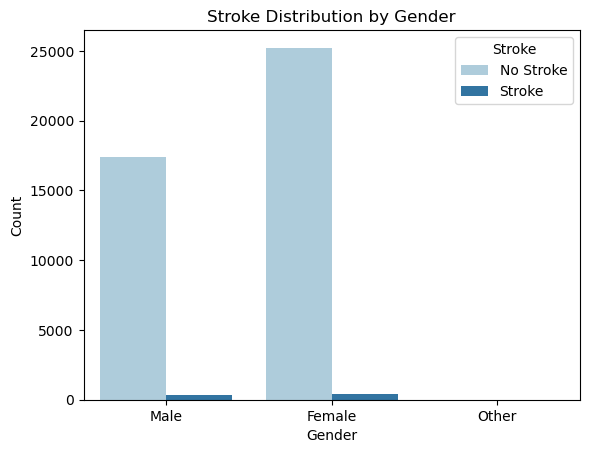

In [259]:
sns.countplot(x='gender', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

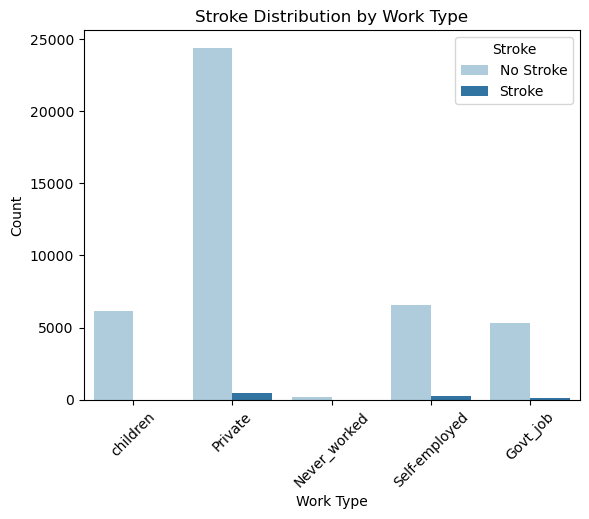

In [260]:
sns.countplot(x='work_type', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.show()


In [261]:

def addcolumns(df):
    # Bin age and bmi into intervals
    age_bins = [0, 18, 30, 45, 60, 75, 90, 100]
    bmi_bins = [0, 18.5, 25, 30, 35, 40, 100]
    
    df['age_interval'] = pd.cut(df['age'], bins=age_bins, labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '91-100'])
    df['bmi_interval'] = pd.cut(df['bmi'], bins=bmi_bins, labels=['Underweight', 'Normal weight', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])
    

    return  df

# Example usage
addcolumns(df)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_interval,bmi_interval
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,0-18,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,46-60,Obese II
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0-18,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,61-75,Obese II
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,0-18,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0-18,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,46-60,Obese III
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,76-90,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,31-45,Obese I


/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


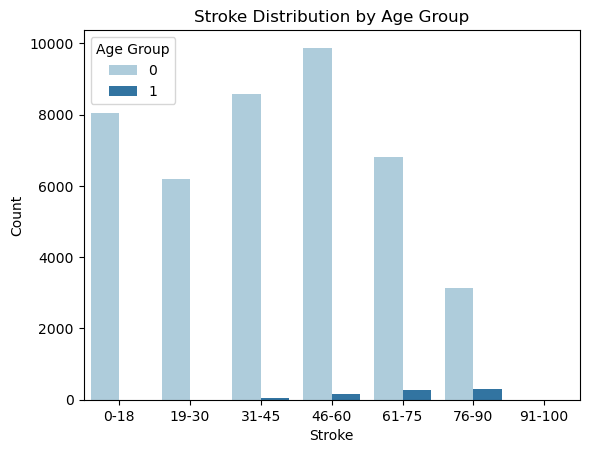

In [262]:

sns.countplot(x='age_interval', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Age Group')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()


/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


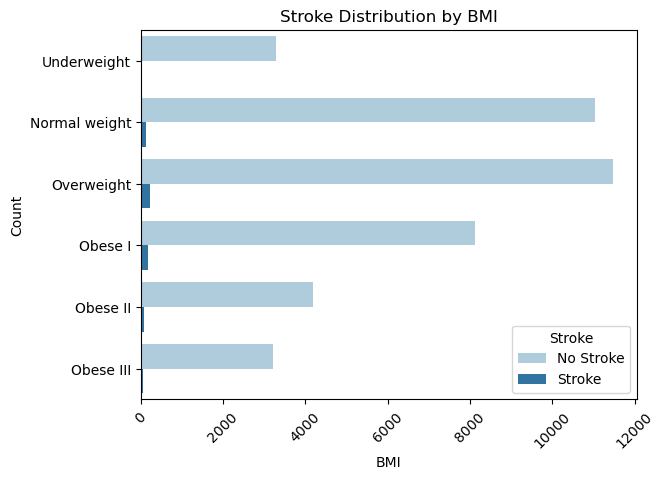

/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


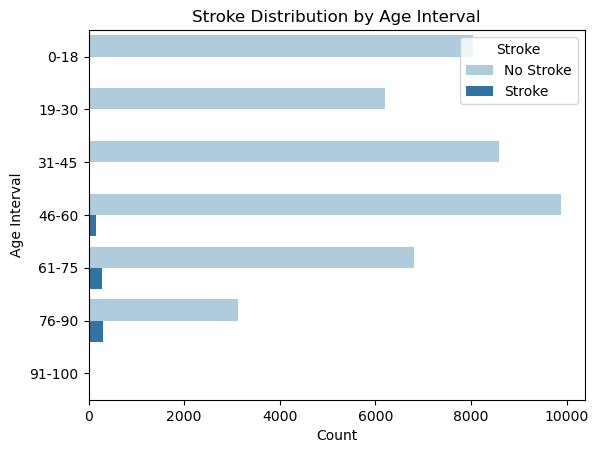

In [263]:
sns.countplot(y='bmi_interval', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.show()

sns.countplot(y='age_interval', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Age Interval')
plt.xlabel('Count')
plt.ylabel('Age Interval')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()


lets see how many null values in the class 1 

In [264]:
df[pd.isna(df["bmi"]) & pd.isna(df["smoking_status"]) & (df["stroke"] == 1)].count()


id                   50
gender               50
age                  50
hypertension         50
heart_disease        50
ever_married         50
work_type            50
Residence_type       50
avg_glucose_level    50
bmi                   0
smoking_status        0
stroke               50
age_interval         50
bmi_interval          0
dtype: int64

we will fill the null values by knn in bmi 

lets see the corrleation between columns

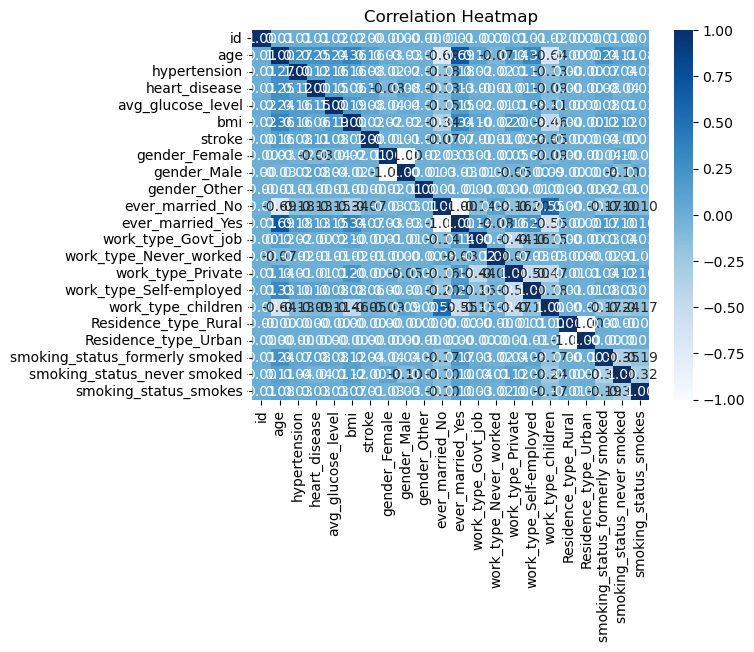

In [265]:
df=df.drop(columns=["age_interval","bmi_interval"])
df_encoded = pd.get_dummies(df)
sns.heatmap( df_encoded.corr(), annot=True,cmap="Blues", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


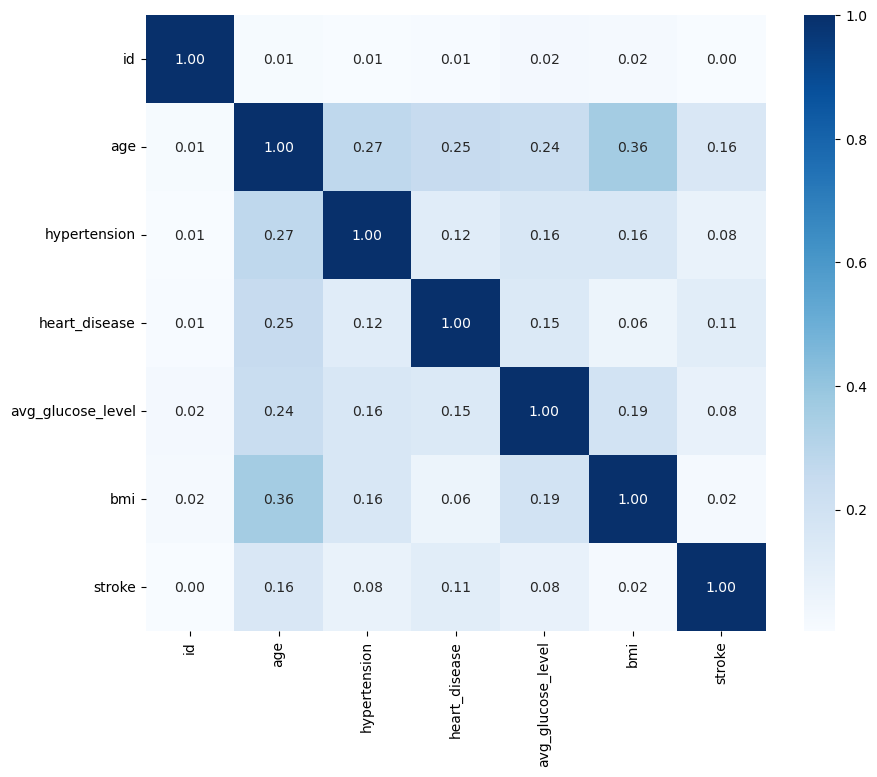

In [266]:
numeric_columns = df.select_dtypes(include=np.number)
corr_matrix = numeric_columns.corr()

plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap="Blues",fmt=".2f")
plt.show()

# Data Preprocessing 

There are multiple ways we can use to deal with an values , we can either fill them with the mode , or create a models that will predict the null values(KNN , random forest ,...) , we will try multiple ones and see who give us better accuracy


In [270]:

from sklearn.impute import SimpleImputer

#? fill the smoking null values with "missing"
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df[['smoking_status']]= imputer.fit_transform(df[['smoking_status']])




# Handling BMI 

In [272]:

#todo Econding non ordinal category columns , hence we will use OneHotEncoder 

df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [273]:
#knn 
knn =  KNNImputer(missing_values=np.nan)
data = knn.fit_transform(df)
knn_data = pd.DataFrame(data , columns=df.columns)

In [274]:
nan_values(knn_data)

,index,Nan count,Nan Percentage,num_unique
0,id,0,0.0,43400
1,work_type_Govt_job,0,0.0,2
2,smoking_status_never smoked,0,0.0,2
3,smoking_status_missing,0,0.0,2
4,smoking_status_formerly smoked,0,0.0,2
5,Residence_type_Urban,0,0.0,2
6,Residence_type_Rural,0,0.0,2
7,work_type_children,0,0.0,2
8,work_type_Self-employed,0,0.0,2
9,work_type_Private,0,0.0,2


In [275]:

#todo or Interpolation , how to know which one is better ? 
interpolate_data = df.copy()
interpolate_data['bmi'] = interpolate_data['bmi'].interpolate(method='linear', limit_direction='both')
nan_values(interpolate_data)


,index,Nan count,Nan Percentage,num_unique
0,id,0,0.0,43400
1,work_type_Govt_job,0,0.0,2
2,smoking_status_never smoked,0,0.0,2
3,smoking_status_missing,0,0.0,2
4,smoking_status_formerly smoked,0,0.0,2
5,Residence_type_Urban,0,0.0,2
6,Residence_type_Rural,0,0.0,2
7,work_type_children,0,0.0,2
8,work_type_Self-employed,0,0.0,2
9,work_type_Private,0,0.0,2


In [276]:
#check the shape after encoding 
df.shape

(43400, 23)

# Model 

In [278]:
# we will try the knn data first 
knn_data= knn_data .drop(columns=["id"])

interpolate_data = interpolate_data.drop(columns=["id"])

In [279]:
knn_data.shape

(43400, 22)

In [280]:

"""
#Reverse the one-hot encoding
# Define the columns to be reversed
categorical_columns = {
    'gender': ['gender_Female', 'gender_Male', 'gender_Other'],
    'ever_married': ['ever_married_No', 'ever_married_Yes'],
    'work_type': ['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
    'Residence_type': ['Residence_type_Rural', 'Residence_type_Urban'],
    'smoking_status': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
}

for col, dummy_cols in categorical_columns.items():
    # Find the index of the max value in the dummy columns
    knn_data[col] = knn_data[dummy_cols].idxmax(axis=1)
    # Replace the column names with the original category names
    knn_data[col] = knn_data[col].apply(lambda x: x.split('_', 1)[1])

# Drop the dummy columns
knn_data.drop(columns=[col for cols in categorical_columns.values() for col in cols], inplace=True)

# Display the resulting DataFrame
print(knn_data)"""

"\n#Reverse the one-hot encoding\n# Define the columns to be reversed\ncategorical_columns = {\n    'gender': ['gender_Female', 'gender_Male', 'gender_Other'],\n    'ever_married': ['ever_married_No', 'ever_married_Yes'],\n    'work_type': ['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'],\n    'Residence_type': ['Residence_type_Rural', 'Residence_type_Urban'],\n    'smoking_status': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']\n}\n\nfor col, dummy_cols in categorical_columns.items():\n    # Find the index of the max value in the dummy columns\n    knn_data[col] = knn_data[dummy_cols].idxmax(axis=1)\n    # Replace the column names with the original category names\n    knn_data[col] = knn_data[col].apply(lambda x: x.split('_', 1)[1])\n\n# Drop the dummy columns\nknn_data.drop(columns=[col for cols in categorical_columns.values() for col in cols], inplace=True)\n\n# Display 

In [281]:
knn_data.max()

age                                82.00
hypertension                        1.00
heart_disease                       1.00
avg_glucose_level                 291.05
bmi                                97.60
stroke                              1.00
gender_Female                       1.00
gender_Male                         1.00
gender_Other                        1.00
ever_married_No                     1.00
ever_married_Yes                    1.00
work_type_Govt_job                  1.00
work_type_Never_worked              1.00
work_type_Private                   1.00
work_type_Self-employed             1.00
work_type_children                  1.00
Residence_type_Rural                1.00
Residence_type_Urban                1.00
smoking_status_formerly smoked      1.00
smoking_status_missing              1.00
smoking_status_never smoked         1.00
smoking_status_smokes               1.00
dtype: float64

In [282]:
interpolate_data.max()

age                                 82.0
hypertension                           1
heart_disease                          1
avg_glucose_level                 291.05
bmi                                 97.6
stroke                                 1
gender_Female                       True
gender_Male                         True
gender_Other                        True
ever_married_No                     True
ever_married_Yes                    True
work_type_Govt_job                  True
work_type_Never_worked              True
work_type_Private                   True
work_type_Self-employed             True
work_type_children                  True
Residence_type_Rural                True
Residence_type_Urban                True
smoking_status_formerly smoked      True
smoking_status_missing              True
smoking_status_never smoked         True
smoking_status_smokes               True
dtype: object

In [283]:
knn_data.dtypes

age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_formerly smoked    float64
smoking_status_missing            float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [284]:
interpolate_data.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                        bool
gender_Male                          bool
gender_Other                         bool
ever_married_No                      bool
ever_married_Yes                     bool
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Rural                 bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_missing               bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object

In [285]:
float_columns = knn_data.select_dtypes(include=['float64']).columns

scaler = MinMaxScaler()
knn_data[float_columns] = scaler.fit_transform(knn_data[float_columns])

# Separate features and target
X_knn = knn_data.drop('stroke',axis=1)
y_knn = knn_data['stroke']

# Perform train-test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)


In [286]:
float_columns = interpolate_data.select_dtypes(include=['float64']).columns

scaler = MinMaxScaler()
interpolate_data[float_columns] = scaler.fit_transform(interpolate_data[float_columns])

# Separate features and target
X_interpolate = interpolate_data.drop('stroke',axis=1)
y_interpolate = interpolate_data["stroke"]

# Perform train-test split
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interpolate, y_interpolate, test_size=0.3, random_state=42)


In [287]:


# Oversample stroke  (label 1)
oversampler = RandomOverSampler(sampling_strategy={1: 21307},random_state=42)
X_res_knn, y_res_knn = oversampler.fit_resample(X_knn, y_knn)


# Undersample non stroke (label 0)
undersampler = RandomUnderSampler(sampling_strategy={0: 21307}, random_state=42)
X_res_knn, y_res_knn = undersampler.fit_resample(X_res_knn, y_res_knn)


# Combine X_res and y_res back into a DataFrame
df_resampled = pd.DataFrame(X_res_knn, columns=X_knn.columns)
df_resampled['stroke'] = y_res_knn

# Display the class distribution
print(df_resampled['stroke'].value_counts())

XKnn = df_resampled.drop('stroke', axis=1)
yKnn= df_resampled['stroke']
# Perform train-test split
X_train_resampled_knn, X_test_resampled_knn, y_train_resampled_knn, y_test_resampled_knn= train_test_split(XKnn, yKnn, test_size=0.3, random_state=42)



stroke
0.0    21307
1.0    21307
Name: count, dtype: int64


In [288]:


# Oversample stroke  (label 1)
oversampler = RandomOverSampler(sampling_strategy={1: 21307},random_state=42)
X_res_int, y_res_int = oversampler.fit_resample(X_interpolate, y_interpolate)


# Undersample non stroke (label 0)
undersampler = RandomUnderSampler(sampling_strategy={0: 21307}, random_state=42)
X_res_int, y_res_int = undersampler.fit_resample(X_res_int, y_res_int)


# Combine X_res and y_res back into a DataFrame
df_resampled = pd.DataFrame(X_res_int, columns=X_interpolate.columns)
df_resampled['stroke'] = y_res_int

# Display the class distribution
print(df_resampled['stroke'].value_counts())

Xint = df_resampled.drop('stroke', axis=1)
yint= df_resampled['stroke']
# Perform train-test split
X_train_resampled_int, X_test_resampled_int, y_train_resampled_int, y_test_resampled_int= train_test_split(Xint, yint, test_size=0.3, random_state=42)



stroke
0    21307
1    21307
Name: count, dtype: int64


In [294]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

# Instantiate the BaggingClassifier and GradientBoostingClassifier
bagging_clf = BaggingClassifier(random_state=42)
boosting_clf = GradientBoostingClassifier(random_state=42)

# Train the models
bagging_clf.fit(X_train_resampled_int, y_train_resampled_int)
boosting_clf.fit(X_train_resampled_int, y_train_resampled_int)

# Make predictions
bagging_pred = bagging_clf.predict(X_test_resampled_int)
boosting_pred = boosting_clf.predict(X_test_resampled_int)

# Calculate evaluation metrics
bagging_report_model = classification_report(y_test_resampled_int, bagging_pred)
boosting_report_model = classification_report(y_test_resampled_int, boosting_pred)

bagging_accuracy = accuracy_score(y_test_resampled_int, bagging_pred)
boosting_accuracy = accuracy_score(y_test_resampled_int, boosting_pred)


# Print the evaluation metrics
print("Int Bagging Classification report:")
print(bagging_report_model)
print("Accuracy:", bagging_accuracy)
print()

print("Int Boosting Classification report:")
print(boosting_report_model)
print("Accuracy:", boosting_accuracy)
print()


Int Bagging Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6384
           1       0.98      1.00      0.99      6401

    accuracy                           0.99     12785
   macro avg       0.99      0.99      0.99     12785
weighted avg       0.99      0.99      0.99     12785

Accuracy: 0.9913179507235041

Int Boosting Classification report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      6384
           1       0.77      0.86      0.82      6401

    accuracy                           0.80     12785
   macro avg       0.81      0.80      0.80     12785
weighted avg       0.81      0.80      0.80     12785

Accuracy: 0.8046147829487681



In [293]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

# Instantiate the BaggingClassifier and GradientBoostingClassifier
bagging_clf = BaggingClassifier(random_state=42)
boosting_clf = GradientBoostingClassifier(random_state=42)

# Train the models
bagging_clf.fit(X_train_resampled_knn, y_train_resampled_knn)
boosting_clf.fit(X_train_resampled_knn, y_train_resampled_knn)

# Make predictions
bagging_pred = bagging_clf.predict(X_test_resampled_knn)
boosting_pred = boosting_clf.predict(X_test_resampled_knn)

# Calculate evaluation metrics
bagging_report_model = classification_report(y_test_resampled_knn, bagging_pred)
boosting_report_model = classification_report(y_test_resampled_knn, boosting_pred)

bagging_accuracy = accuracy_score(y_test_resampled_knn, bagging_pred)
boosting_accuracy = accuracy_score(y_test_resampled_knn, boosting_pred)


# Print the evaluation metrics
print("knn Bagging Classification report:")
print(bagging_report_model)
print("Accuracy:", bagging_accuracy)
print()

print("knn Boosting Classification report:")
print(boosting_report_model)
print("Accuracy:", boosting_accuracy)
print()


knn Bagging Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6384
         1.0       0.98      1.00      0.99      6401

    accuracy                           0.99     12785
   macro avg       0.99      0.99      0.99     12785
weighted avg       0.99      0.99      0.99     12785

Accuracy: 0.9912397340633555

knn Boosting Classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.79      6384
         1.0       0.77      0.86      0.82      6401

    accuracy                           0.81     12785
   macro avg       0.81      0.81      0.81     12785
weighted avg       0.81      0.81      0.81     12785

Accuracy: 0.8060226828314431



 resourse for stacking classifier :https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results#5.1-Level-0-with-28-Models

In [295]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [296]:

XGB = XGBClassifier(random_state=42)
boosting_and_bagging_estimators = [
    ('AdaBoost', AdaBoostClassifier(random_state=13)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=13)),
    ('XGB', XGBClassifier(random_state=13)),
    ('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13)),
    ('Bagging', BaggingClassifier(random_state=13)),
    ('RandomForest', RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=170, random_state=13)),
]


In [303]:

from sklearn.model_selection import cross_val_score

XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
SC_knn = StackingClassifier(estimators=boosting_and_bagging_estimators, cv=6)

SC_knn.fit(X_train_resampled_knn, y_train_resampled_knn)

train_accuracy = SC_knn.score(X_train_resampled_knn, y_train_resampled_knn)
test_accuracy = SC_knn.score(X_test_resampled_knn, y_test_resampled_knn)
y_pred = SC_knn.predict(X_test_resampled_knn)
report = classification_report(y_test_resampled_knn, y_pred)

# Train and evaluate individual models for comparison
for name, model in boosting_and_bagging_estimators:
    model.fit(X_train_resampled_knn, y_train_resampled_knn)  
    train_accuracy_model = model.score(X_train_resampled_knn, y_train_resampled_knn)
    test_accuracy_model = model.score(X_test_resampled_knn, y_test_resampled_knn)
    y_pred_model = model.predict(X_test_resampled_knn)
    report_model = classification_report(y_test_resampled_knn, y_pred_model)
    cv_scores_model = cross_val_score(model, X_train_resampled_knn, y_train_resampled_knn, cv=6, scoring='accuracy')
    
    
    print(f"{name} training Accuracy: {train_accuracy_model:.2f}")
    print(f"{name} test Accuracy: {test_accuracy_model:.2f}")
    print(f"{name} classification report:\n{report_model}\n")
    print(f"{name} average CV Accuracy: {cv_scores_model} ")
    display(pd.crosstab(y_test_resampled_knn, y_pred_model))


cv_scores_sc_knn = cross_val_score(SC_knn, X_train_resampled_knn, y_train_resampled_knn, cv=6, scoring='accuracy')
mean_cv_score_sc_knn = cv_scores_sc_knn.mean()
std_cv_score_sc_knn = cv_scores_sc_knn.std()


# Display results for the stacking classifier
print(f"\nStacking classifier training Accuracy: {train_accuracy:.2f}")
print(f"Stacking classifier test Accuracy: {test_accuracy:.2f}")
print(f"Stacking classifier classification report:\n{report}\n")
print(f"Stacking classifier average CV Accuracy: {mean_cv_score_sc_knn:.2f} ± {std_cv_score_sc_knn:.2f}")



/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit

AdaBoost training Accuracy: 0.79
AdaBoost test Accuracy: 0.78
AdaBoost classification report:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77      6384
         1.0       0.75      0.85      0.80      6401

    accuracy                           0.78     12785
   macro avg       0.79      0.78      0.78     12785
weighted avg       0.79      0.78      0.78     12785


AdaBoost average CV Accuracy: [0.79243765 0.78640386 0.78942076 0.77408972 0.78294106 0.7923959 ] 


col_0,0.0,1.0
stroke,,
0.0,4538,1846
1.0,939,5462


GradientBoosting training Accuracy: 0.81
GradientBoosting test Accuracy: 0.81
GradientBoosting classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.79      6384
         1.0       0.77      0.86      0.82      6401

    accuracy                           0.81     12785
   macro avg       0.81      0.81      0.81     12785
weighted avg       0.81      0.81      0.81     12785


GradientBoosting average CV Accuracy: [0.81234916 0.80993564 0.80973451 0.80366124 0.80667874 0.81754174] 


col_0,0.0,1.0
stroke,,
0.0,4772,1612
1.0,867,5534


XGB training Accuracy: 0.97
XGB test Accuracy: 0.96
XGB classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      6384
         1.0       0.92      1.00      0.96      6401

    accuracy                           0.96     12785
   macro avg       0.96      0.96      0.96     12785
weighted avg       0.96      0.96      0.96     12785


XGB average CV Accuracy: [0.95736122 0.9533387  0.95736122 0.95232348 0.94588614 0.94568497] 


col_0,0,1
stroke,,
0.0,5817,567
1.0,0,6401


CatBoost training Accuracy: 0.96
CatBoost test Accuracy: 0.94
CatBoost classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      6384
         1.0       0.89      1.00      0.94      6401

    accuracy                           0.94     12785
   macro avg       0.95      0.94      0.94     12785
weighted avg       0.95      0.94      0.94     12785


CatBoost average CV Accuracy: [0.93584071 0.93604183 0.93986323 0.92597063 0.9285858  0.9346208 ] 


col_0,0.0,1.0
stroke,,
0.0,5629,755
1.0,17,6384


Bagging training Accuracy: 1.00
Bagging test Accuracy: 0.99
Bagging classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6384
         1.0       0.98      1.00      0.99      6401

    accuracy                           0.99     12785
   macro avg       0.99      0.99      0.99     12785
weighted avg       0.99      0.99      0.99     12785


Bagging average CV Accuracy: [0.98813355 0.99034594 0.99135157 0.98571716 0.99054516 0.98813116] 


col_0,0.0,1.0
stroke,,
0.0,6267,117
1.0,0,6401


RandomForest training Accuracy: 0.88
RandomForest test Accuracy: 0.87
RandomForest classification report:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      6384
         1.0       0.83      0.93      0.87      6401

    accuracy                           0.87     12785
   macro avg       0.87      0.87      0.87     12785
weighted avg       0.87      0.87      0.87     12785


RandomForest average CV Accuracy: [0.88093323 0.87771521 0.87851971 0.86521827 0.86944277 0.87889761] 


col_0,0.0,1.0
stroke,,
0.0,5159,1225
1.0,470,5931


/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit


Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 1.00
Stacking classifier classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6384
         1.0       1.00      1.00      1.00      6401

    accuracy                           1.00     12785
   macro avg       1.00      1.00      1.00     12785
weighted avg       1.00      1.00      1.00     12785


Stacking classifier average CV Accuracy: 1.00 ± 0.00


In [298]:


XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
SC_int = StackingClassifier(estimators=boosting_and_bagging_estimators, cv=6)

SC_int.fit(X_train_resampled_int, y_train_resampled_int)

train_accuracy = SC_knn.score(X_train_resampled_int, y_train_resampled_int)
test_accuracy = SC_knn.score(X_test_resampled_int, y_test_resampled_int)
y_pred = SC_knn.predict(X_test_resampled_int)
report = classification_report(y_test_resampled_int, y_pred)

# Train and evaluate individual models for comparison
for name, model in boosting_and_bagging_estimators:
    model.fit(X_train_resampled_int, y_train_resampled_int)  
    train_accuracy_model = model.score(X_train_resampled_int, y_train_resampled_int)
    test_accuracy_model = model.score(X_test_resampled_int, y_test_resampled_int)
    y_pred_model = model.predict(X_test_resampled_int)
    report_model = classification_report(y_test_resampled_int, y_pred_model)
    
    print(f"{name} training Accuracy: {train_accuracy_model:.2f}")
    print(f"{name} test Accuracy: {test_accuracy_model:.2f}")
    print(f"{name} classification report:\n{report_model}\n")
    display(pd.crosstab(y_test_resampled_knn, y_pred_model))

# Display results for the stacking classifier
print(f"\nStacking classifier training Accuracy: {train_accuracy:.2f}")
print(f"Stacking classifier test Accuracy: {test_accuracy:.2f}")
print(f"Stacking classifier classification report:\n{report}\n")


/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit

AdaBoost training Accuracy: 0.79
AdaBoost test Accuracy: 0.78
AdaBoost classification report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      6384
           1       0.75      0.84      0.79      6401

    accuracy                           0.78     12785
   macro avg       0.79      0.78      0.78     12785
weighted avg       0.79      0.78      0.78     12785




col_0,0,1
stroke,,
0.0,4594,1790
1.0,1012,5389


GradientBoosting training Accuracy: 0.81
GradientBoosting test Accuracy: 0.80
GradientBoosting classification report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      6384
           1       0.77      0.86      0.82      6401

    accuracy                           0.80     12785
   macro avg       0.81      0.80      0.80     12785
weighted avg       0.81      0.80      0.80     12785




col_0,0,1
stroke,,
0.0,4777,1607
1.0,891,5510


XGB training Accuracy: 0.97
XGB test Accuracy: 0.95
XGB classification report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      6384
           1       0.91      1.00      0.95      6401

    accuracy                           0.95     12785
   macro avg       0.95      0.95      0.95     12785
weighted avg       0.95      0.95      0.95     12785




col_0,0,1
stroke,,
0.0,5747,637
1.0,0,6401


CatBoost training Accuracy: 0.96
CatBoost test Accuracy: 0.94
CatBoost classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      6384
           1       0.90      1.00      0.94      6401

    accuracy                           0.94     12785
   macro avg       0.95      0.94      0.94     12785
weighted avg       0.95      0.94      0.94     12785




col_0,0,1
stroke,,
0.0,5638,746
1.0,28,6373


Bagging training Accuracy: 1.00
Bagging test Accuracy: 0.99
Bagging classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6384
           1       0.98      1.00      0.99      6401

    accuracy                           0.99     12785
   macro avg       0.99      0.99      0.99     12785
weighted avg       0.99      0.99      0.99     12785




col_0,0,1
stroke,,
0.0,6268,116
1.0,0,6401


RandomForest training Accuracy: 0.88
RandomForest test Accuracy: 0.87
RandomForest classification report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      6384
           1       0.83      0.93      0.88      6401

    accuracy                           0.87     12785
   macro avg       0.87      0.87      0.87     12785
weighted avg       0.87      0.87      0.87     12785




col_0,0,1
stroke,,
0.0,5145,1239
1.0,457,5944



Stacking classifier training Accuracy: 0.92
Stacking classifier test Accuracy: 0.92
Stacking classifier classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      6384
           1       1.00      0.84      0.91      6401

    accuracy                           0.92     12785
   macro avg       0.93      0.92      0.92     12785
weighted avg       0.93      0.92      0.92     12785




In [299]:
#lgBoosting
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgb.fit(X_train_resampled_int, y_train_resampled_int)
pred = lgb.predict(X_test_resampled_int)
lgboosting_accuracy = accuracy_score(y_test_resampled_int, pred)
print("LGBoost Accuracy:", lgboosting_accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14906, number of negative: 14923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 29829, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499715 -> initscore=-0.001140
[LightGBM] [Info] Start training from score -0.001140
LGBoost Accuracy: 0.9037152913570591


In [300]:
#lgBoosting
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgb.fit(X_train_resampled_knn, y_train_resampled_knn)
pred = lgb.predict(X_test_resampled_knn)
lgboosting_accuracy = accuracy_score(y_test_resampled_knn, pred)
print("LGBoost Accuracy:", lgboosting_accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14906, number of negative: 14923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 29829, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499715 -> initscore=-0.001140
[LightGBM] [Info] Start training from score -0.001140
LGBoost Accuracy: 0.9073132577238952
